## Problem 1.1
No, the given dataset is not linearly separable, since the curves when plotted for the two sets of data intersect. Thus, there is no line that can separate the data ino two different groups.

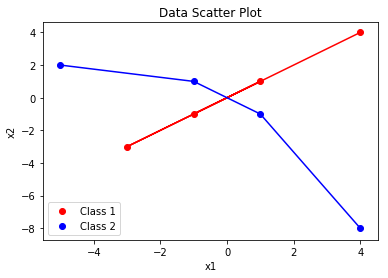

In [1]:
import matplotlib .pyplot as plt

x = [-1,1,-3,4]
y = [-1,1,-3,4]

plt.scatter(x,y,c='red',label='Class 1')
plt.plot(x,y,c='red')

x = [-5,-1,1,4]
y = [2,1,-1,-8]

plt.scatter(x,y,c='blue',label='Class 2')
plt.plot(x,y,c='blue')

plt.title("Data Scatter Plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=3)

plt.savefig('data.jpg')
plt.show()
fig = plt.plot

## Problem 1.2:
To define a new dimension z based on x_{1} and x_{2}

Let $z = |x_{1} - x_{2}|$

In the above transformation, all points belonging to group 1 map to y=0, and all points belonging to group 2 take values>0.
- Group 1: [ (-1,-1,0), (-3,-3,0), (1,1,0), (4,4,0) ]
- Group 2: [ (-5,2,7), (-1,1,2), (1,-1,2), (4,-8,12) ]

## Problem 1.3:
The separating hyperplane is any plane where z > 0 and z < min{z}. For eg: z=0.01

## Problem 1.4:
Very few types of data in real life are inherently linear separable, and in turn we are unable to apply our traditional regression models to it for classification or prediction purposes. Non-linear transformations converts the given features of the dataset into a linearly separable form, at which point models such as Support Vector Machines (linear kernal), or logistic and linear regressions can be used.

## Problem 2.1
To prove that E [MSE] = $Bias^2$ + Variance + Noise
Let g(x) be the predicted value of x, and f(x) be the actual underlying distribution.
$$ 
\begin{align}
MSE &= E [(g(x) - f(x) + \epsilon)^2] \\
&= E \,[\,((g(x) + E[g(x)] - E[g(x)] - f(x) + \epsilon)^2 \,] \\
&= E \,[\,(g(x) - E[g(x)])^2 + 2(g(x)-E[g(x)](E[g(x)]-f(x)) + \epsilon^2\,] \\
&= E[\,(g(x) - E([g(x)])^2] + 2(E[g(x)]-g(x))(E[g(x)]-E[g(x)]) + E[(E(g(x)-f(x))^2 + \epsilon^2] \\
\end{align}
$$

We know that $E[g(x) - E(g(x)] = E[g(x)] - E[g(x)] = 0$. 
Thus, the term in the middle vanishes. Therefore,
$$
\begin{align}
MSE &= Bias^2\,+\,Variance\,+\,Noise
\end{align}
$$
    

## Problem 2.2: 
y(x) = x + sin(1.5x) + N (0, 0.3) and f(x) = y(x) = x + sin(1.5x). The code below generates 20 points of the above distribution, and prints the function with and without noise for comparison purposes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import sample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
def f_hat(x):
    return x+1.5*math.sin(x)+np.random.normal(0,0.3,size=1)
fv_hat = np.vectorize(f_hat)

def f(x):
    return x+1.5*math.sin(x)
f = np.vectorize(f)

In [4]:
x = np.random.randint(low=1,high=1000,size=20)
x = [i/100 for i in x]
x = np.sort(x)

In [5]:
y_hat = fv_hat(x)
y = f(x)

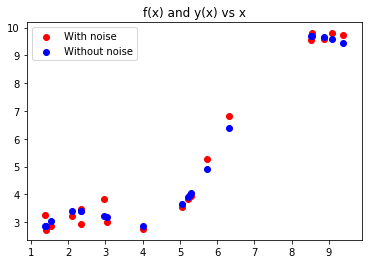

In [6]:
plt.title('f(x) and y(x) vs x')
plt.scatter(x,y_hat,c='red',label='With noise')
plt.scatter(x,y,c='blue',label='Without noise')
plt.legend(loc=2)
plt.show()

### Problem 2.3 
Fit polynomial estimators of varying degree to the data to identify the best fit, underfitting and overfitting degree.

In [7]:
g1 = np.polyfit(x,y_hat,1)
g3 = np.polyfit(x,y_hat,3)
g10 = np.polyfit(x,y_hat,10)

p1 = np.poly1d(g1)
p3 = np.poly1d(g3)
p10 = np.poly1d(g10)

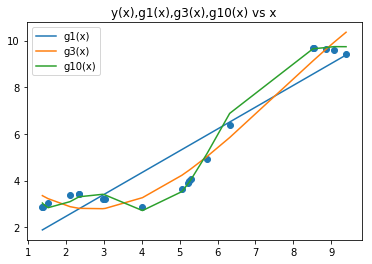

In [8]:
plt.title('y(x),g1(x),g3(x),g10(x) vs x')
plt.scatter(x,f(x))
plt.plot(x,p1(x),label=('g1(x)'))
plt.plot(x,p3(x),label='g3(x)')
plt.plot(x,p10(x),label='g10(x)')
plt.legend(loc=2)
plt.show()

From the above, it is clear that g1(x) underfits the given data points as it is a linear line. Both g3 and g10 provide satisfying fits, however, g10 overfits the data.

## Problem 2.4:
To generate 100 datasets from Y, partition into an 80:20 training and test set split, fir estimators g1-g15. To calculate bias, variance, and error on test set, and identify the best model.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from random import sample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
def F(x):
    return x+1.5*math.sin(1.5*x)
f = np.vectorize(F)

bias = np.zeros(15)
variance = np.zeros(15)
test_err = np.zeros(15)

'''
x - input data
y - input labels
f(x) - actual underlying distribution
x_train - data training split
y_train - label training split
x_test - data test split
y_test - test split actual label
y_hat_test - predicted value of x_test
'''

for i in range(100):
    x = np.random.randint(low=1,high=5000,size=50)
    x = [i/100 for i in x]
    x = np.sort(x).reshape(len(x),1)
    y = f(x) + np.random.normal(0,0.3,size=(50,1))
    
    
    y.reshape(len(y),1)
    # Dataset generated: x,y 
    
    # Split dataset into train and test
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31)
    
    #Loop over polynomial degree
    g_x = np.zeros(15)
    for j in range(15):
        # Define Polynomial model
        polyModel = PolynomialFeatures(degree=j+1)
        x_train_pol = polyModel.fit_transform(x_train.reshape(-1,1))
        x_test_poly = polyModel.transform(x_test.reshape(-1,1))
        
        # Define Regression model
        linearModel = LinearRegression(fit_intercept=False)
        linearModel.fit(x_train_pol, y_train)
        
        # Make predictions
        y_hat_test = linearModel.predict(x_test_poly)
        y_hat_train = linearModel.predict(x_train_pol)
        
        # Calculate metrics
        bias[j] = bias[j] + np.mean(y_hat_test) - np.mean(y_test)
        test_err[j] = test_err[j] + mean_squared_error(y_test,y_hat_test)
        g_x[j] = y_hat_train[10]
    E_g_x = np.mean(g_x)
    for j in range(15):
        variance[j] = (g_x[j] - E_g_x)**2

# Calculate mean metrics for varying polynomial degree
mean_bias = bias/100
#mean_variance = variance/100
mean_test_err = test_err/100

In [13]:
# Show data
from prettytable import PrettyTable

t = PrettyTable(['Polynomial Degree','Bias','Variance','Test Error'])
for power,bias,variance,test_err in zip([i for i in range(15)],mean_bias,variance,mean_test_err):
    t.add_row([power+1,bias,variance,test_err])
print(t)

+-------------------+-----------------------+-----------------------+--------------------+
| Polynomial Degree |          Bias         |        Variance       |     Test Error     |
+-------------------+-----------------------+-----------------------+--------------------+
|         1         |  -0.05298862169596303 | 0.0005466658748096153 | 1.2407782958396085 |
|         2         |  -0.06632364802284213 |  0.015734113165852773 | 1.337393040355465  |
|         3         |  0.006881728064170112 |  0.14925753366591743  | 1.3605912298314835 |
|         4         | -0.021361686450458918 |   0.1279926748477037  | 1.4409020519587714 |
|         5         |  -0.02913357327289926 |   0.3551087396740499  | 1.5216721748833886 |
|         6         |  -0.06050874539940519 |   0.6903090455051997  | 1.821271828919991  |
|         7         |  -0.03883014604731638 |   0.5854170320927119  | 3.075808645518005  |
|         8         | -0.006305185206356221 |   0.8775833298424128  | 3.174320187310233  |

Behaviour:
As the degree of the polynomial increases, the Bias and training error on the test set increase drastically, while the variance across different polynomial models decreases. This can be explained by the fact that higher the degree of the polynomial, lesser the bias as the model overfits. Simultaneously, the models become increasingly consistent as the degree increases, reducing the variance.

Thus, the best model might be with a polynomial of degree 9, with a comparitively low bias and variance, and a reasonable test error.

## Problem 2.5 
Ridge Regression and comparison for polynomial of degree 10

In [14]:
from sklearn.linear_model import Ridge

In [15]:
def F(x):
    return x+1.5*math.sin(1.5*x)
f = np.vectorize(F)

bias = np.zeros(15)
variance = np.zeros(15)
test_err = np.zeros(15)

'''
x - input data
y - input labels
f(x) - actual underlying distribution
x_train - data training split
y_train - label training split
x_test - data test split
y_test - test split actual label
y_hat_test - predicted value of x_test
'''

for i in range(100):
    x = np.random.randint(low=1,high=5000,size=100)
    x = [i/100 for i in x]
    x = np.sort(x).reshape(len(x),1)
    y = f(x) + np.random.normal(0,0.3,size=(100,1))
    y.reshape(len(y),1)
    # Dataset generated: x,y 
    
    # Split dataset into train and test
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31)
    
    # Define Polynomial model
    polyModel = PolynomialFeatures(degree=10)
    x_train_pol = polyModel.fit_transform(x_train.reshape(-1,1))
    x_test_poly = polyModel.transform(x_test.reshape(-1,1))
        
    # Define Regression model
    linearModel = LinearRegression(fit_intercept=False)
    linearModel.fit(x_train_pol, y_train)
        
    # Make predictions
    y_hat_test = linearModel.predict(x_test_poly)
        
    # Calculate metrics
    bias[0] = bias[0] + (np.mean(y_test) - np.mean(y_hat_test))**2
    variance[0] = variance[0] + np.mean(y_test) - np.mean(y_hat_test)
    test_err[0] = test_err[0] + mean_squared_error(y_test,y_hat_test)
    
    rrModel = Ridge(alpha=0.01)
    rrModel.fit(x_train,y_train)
    y_hat_rr_test = rrModel.predict(x_test.reshape(len(x_test),1))
    
    bias[1] = bias[1] + (np.mean(y_test) - np.mean(y_hat_rr_test))**2
    variance[1] = variance[1] + np.mean(y_test) - np.mean(y_hat_rr_test)
    test_err[1] = test_err[1] + mean_squared_error(y_test,y_hat_rr_test)

# Calculate mean metrics for varying polynomial degree
mean_bias = bias/100
mean_variance = variance/100
mean_test_err = test_err/100

In [16]:
from prettytable import PrettyTable

t = PrettyTable(['Polynomial Degree','Bias','Variance','Test Error'])
for power,bias,variance,test_err in zip([i for i in range(2)],mean_bias,mean_variance,mean_test_err):
    t.add_row([power+1,bias,variance,test_err])
print(t)

+-------------------+---------------------+----------------------+--------------------+
| Polynomial Degree |         Bias        |       Variance       |     Test Error     |
+-------------------+---------------------+----------------------+--------------------+
|         1         | 0.19717118108169976 |  0.3400924476861611  | 1.746237266853818  |
|         2         | 0.08865415856055808 | 0.049450137539248755 | 1.2461927408203008 |
+-------------------+---------------------+----------------------+--------------------+


It is clear that the model performs much better with regularization. This is because of the fact that regularization forces the coeffecients of the higher order terms of the polynomial to take values very close to zero, thus decreasing their effect. Thus, a higher order polynomial behaves close to a lower order polynomial on the training data, but is flexible enough to work well with lesser error on the test data.

# Problem 3

## Problem 3.1
Datasets chosen: 
- Electricity:  Each example of the dataset refers to a period of 30 minutes. It has 5 fields: the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales, and the target is to identify whether electricity should be transfered to or from NSW. Summary:
    
    - No. of Instances: 45,312
    - No. of Features:  9
    - No. of classes:   2
    - No. of Numerical Features: 8
    - No. of Nominal Featires : 1
    
- Plant Shapes: The mission is to classify the given plant into one of the 100 different categories, based on shape, texture and color of the leaf, which in total produce a total of 64 features.

    - No. of Instances: 1600
    - No. of Features:  65
    - No. of classes:   100
    - No. of Categorical Features : 1
    - No. of Numerical Features :   64

## Problem 3.2 : 
To train Random forest and Gradient boosting models on the two different datasets with training size varying between 10 and 100%, and to plot the learning curve and time taken for the same

### Dataset 1: Electricity Metrics

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv ('electricity-normalized.csv')
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [3]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
x_test = data_test.iloc[:,0:8]
y_test = data_test.iloc[:,-1]

accuracy_1 = np.zeros(shape=(2,10))
wc_time_1 = np.zeros(shape=(2,10))

for i in range(10):
    trial_train_data = data_train.sample(frac=(i+1)/10)
    x_train = trial_train_data.iloc[:,0:8]
    y_train = trial_train_data.iloc[:,-1]

    # Model 1: Random Forest
    model = RandomForestClassifier()#verbose=2)
    
    start_time = time.time()
    model.fit(x_train,y_train)
    end_time = time.time()
    y_hat = model.predict(x_test)
    
    accuracy_1[0][i] = np.mean(y_test == y_hat)
    wc_time_1[0][i] = (end_time - start_time)
    
    # Model 2: Gradient Boosting
    model = GradientBoostingClassifier()
    
    start_time = time.time()
    model.fit(x_train,y_train)
    end_time = time.time()
    
    y_hat = model.predict(x_test)
    
    accuracy_1[1][i] = np.mean(y_test == y_hat)
    wc_time_1[1][i] = (end_time - start_time)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Accuracy:
 Random Forest:  [0.81308617 0.82919563 0.85082202 0.8564493  0.87057266 0.87333113
 0.87399316 0.88215823 0.88910957 0.89286108] 

 Gradient Boosting:  [0.82776123 0.82897495 0.83007834 0.82831292 0.83382986 0.83129207
 0.83382986 0.83272647 0.83096105 0.83360918]

Training Time:
 Random Forest:  [0.06407714 0.11264825 0.16442084 0.21302342 0.27914882 0.32994175
 0.38798666 0.44902945 0.49549603 0.57091665] 

 Gradient Boosting:  [0.32715034 0.55566287 0.76885152 1.00807381 1.22501063 1.4941721
 1.82235551 2.08986855 2.29862905 2.34718466]


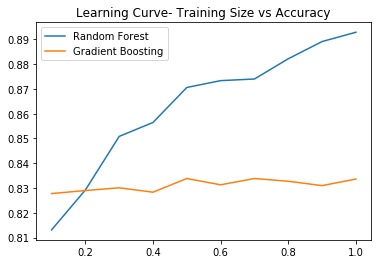

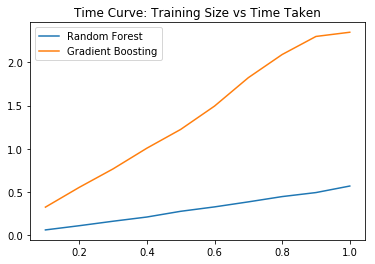

In [5]:
# Plots: Learning Curve and Time Curve for dataset 1
training_size_frac = [(i+1)/10 for i in range(10)]
print(training_size_frac)

print('\nAccuracy:\n Random Forest: ',accuracy_1[0],'\n\n Gradient Boosting: ',accuracy_1[1])
print('\nTraining Time:\n Random Forest: ',wc_time_1[0],'\n\n Gradient Boosting: ',wc_time_1[1])

plt.title('Learning Curve- Training Size vs Accuracy')
plt.plot(training_size_frac,accuracy_1[0],label=('Random Forest'))
plt.plot(training_size_frac,accuracy_1[1],label='Gradient Boosting')
plt.legend(loc=2)
plt.show()

plt.title('Time Curve: Training Size vs Time Taken')
plt.plot(training_size_frac,wc_time_1[0],label=('Random Forest'))
plt.plot(training_size_frac,wc_time_1[1],label='Gradient Boosting')
plt.legend(loc=2)
plt.show()

### Dataset 2 : Plant Classification

In [6]:
df =  pd.read_csv ('one_hundred_plants_shape.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,Class
0,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,0.000594,...,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614,13
1,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,0.000546,...,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667,13
2,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,0.000530,...,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602,13
3,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,0.000600,...,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603,13
4,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,0.000596,...,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594,13


In [7]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)
x_test = data_test.iloc[:,0:64]
y_test = data_test.iloc[:,-1]

accuracy_2 = np.zeros(shape=(2,10))
wc_time_2 = np.zeros(shape=(2,10))

for i in range(10):
    trial_train_data = data_train.sample(frac=(i+1)/10)
    x_train = trial_train_data.iloc[:,0:64]
    y_train = trial_train_data.iloc[:,-1]

    # Model 1: Random Forest
    model = RandomForestClassifier()#verbose=2)
    
    start_time = time.time()
    model.fit(x_train,y_train)
    end_time = time.time()
    y_hat = model.predict(x_test)
    
    accuracy_2[0][i] = np.mean(y_test == y_hat)
    wc_time_2[0][i] = (end_time - start_time)
    
    # Model 2: Gradient Boosting
    model = GradientBoostingClassifier()
    
    start_time = time.time()
    model.fit(x_train,y_train)
    end_time = time.time()
    
    y_hat = model.predict(x_test)
    
    accuracy_2[1][i] = np.mean(y_test == y_hat)
    wc_time_2[1][i] = (end_time - start_time)

print("done tranining!")

done tranining!


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Accuracy:
 Random Forest:  [0.215625 0.278125 0.3375   0.4      0.428125 0.453125 0.44375  0.46875
 0.471875 0.515625] 

 Gradient Boosting:  [0.115625 0.1625   0.21875  0.24375  0.253125 0.28125  0.271875 0.271875
 0.303125 0.303125]

Training Time:
 Random Forest:  [0.03119159 0.04564905 0.0644846  0.07971954 0.09347034 0.10692644
 0.1333437  0.13765764 0.15850401 0.17610526] 

 Gradient Boosting:  [ 4.58907843  7.54989195 10.30418348 13.34804773 17.51604366 22.31822157
 26.34874701 35.54449749 33.43743849 37.12345386]


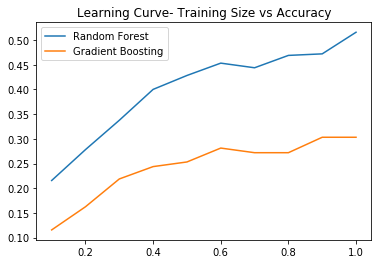

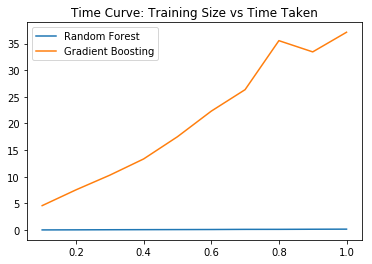

In [9]:
# Plots: Learning Curve and Time Curve for dataset 2
training_size_frac = [(i+1)/10 for i in range(10)]
print(training_size_frac)

print('\nAccuracy:\n Random Forest: ',accuracy_2[0],'\n\n Gradient Boosting: ',accuracy_2[1])
print('\nTraining Time:\n Random Forest: ',wc_time_2[0],'\n\n Gradient Boosting: ',wc_time_2[1])

plt.title('Learning Curve- Training Size vs Accuracy')
plt.plot(training_size_frac,accuracy_2[0],label='Random Forest')
plt.plot(training_size_frac,accuracy_2[1],label='Gradient Boosting')
plt.legend(loc=2)
plt.show()

plt.title('Time Curve: Training Size vs Time Taken')
plt.plot(training_size_frac,wc_time_2[0],label='Random Forest')
plt.plot(training_size_frac,wc_time_2[1],label='Gradient Boosting')
plt.legend(loc=2)
plt.show()

#### Main Observations:
1. In general, as the training size increases, time taken to train our classifier also increases.
2. The Random Forest model tends to provide much better accuracy than gradient boosting.
3. The Random Forest model trains much faster than the Gradient Boosting model, with it being approximately 30x faster when 80% of the entire dataset is used to train the model. This can be explained by the fact that irrespective of the size of the training data, the number of trees built by the forest remains a constant. The marginal increase in time taken is due to the split criterion computation (gini index in this situation), which can be done in O(n) time if the size of the training set is n.




## Problem 5.1:
- False Negatives are not taken into consideration on a PR curves, whereas they are included in the ROC curve. 

- The total number of True Positives, True Negatives, False Positives and False negatives are a constant given a dataset, whether we plot a PR curve or an ROC curve. Thus, the tota number of negative and positive points stay constant. Each point in the ROC curve corresponds to a unique confusion matrix. Given that the total number of negatives is a constant, each point also maps to a unique confusion matrix in the PR space (as long as Recall is not zero, as true negatives is uniquely determinable. If recall=0, we will be unable to calculate the number of false negatives, this giving us a set of confusion matrices one point in the ROC curve can map to). Thus, there is a one-to-one mapping between points on the PR curve and the ROC curve.

## Problem 5.2:
To generate and compare the ROC and PR curves using adaboost and and logistic regression, and to identify the point at which an all-positive classifier lies on the curves

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [37]:
df = pd.read_csv('diabetes.csv')
cleanup = {'class' : {'tested_positive':1, 'tested_negative':0}}
df.replace(cleanup, inplace=True)

x = df.iloc[:,0:8]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_hat_test_lr = model.predict(x_test)
y_hat_test_prob_lr = model.predict_proba(x_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_hat_test_prob_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_hat_test_prob_lr[:,1])

model = AdaBoostClassifier()
model.fit(x_train,y_train)
y_hat_test_ab = model.predict(x_test)
y_hat_test_prob_ab = model.predict_proba(x_test)
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_hat_test_prob_ab[:,1])
roc_auc_ab = auc(fpr_ab, tpr_ab)
precision_ab, recall_ab, threshold = precision_recall_curve(y_test,y_hat_test_prob_ab[:,1])

In [39]:
print(precision_lr)
print(recall_lr)
#print(precision_ab,recall_ab)

[0.35078534 0.34736842 0.34920635 0.35106383 0.35294118 0.35483871
 0.35675676 0.35869565 0.36065574 0.36263736 0.36464088 0.36666667
 0.36871508 0.37078652 0.37288136 0.375      0.37714286 0.37931034
 0.37572254 0.37790698 0.38011696 0.38235294 0.38461538 0.38690476
 0.38922156 0.39156627 0.39393939 0.39634146 0.39877301 0.40123457
 0.40372671 0.40625    0.40880503 0.41139241 0.41401274 0.41666667
 0.41935484 0.42207792 0.4248366  0.42763158 0.43046358 0.43333333
 0.43624161 0.43918919 0.44217687 0.44520548 0.44827586 0.44444444
 0.44755245 0.45070423 0.44680851 0.45       0.44604317 0.44927536
 0.44525547 0.44852941 0.44444444 0.44029851 0.44360902 0.43939394
 0.44274809 0.44615385 0.4496124  0.453125   0.4488189  0.45238095
 0.448      0.4516129  0.45528455 0.45901639 0.46280992 0.46666667
 0.47058824 0.47457627 0.47008547 0.47413793 0.47826087 0.48245614
 0.48672566 0.49107143 0.48648649 0.49090909 0.49541284 0.5
 0.5046729  0.50943396 0.51428571 0.50961538 0.51456311 0.51960784
 0

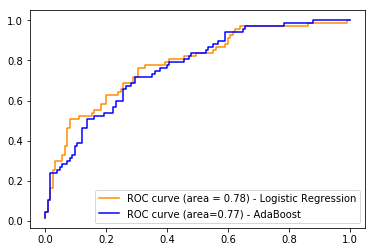

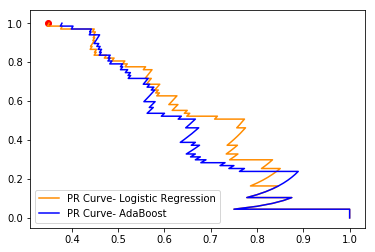

In [40]:
plt.plot(fpr_lr, tpr_lr, color='darkorange', label='ROC curve (area = %0.2f) - Logistic Regression' % roc_auc_lr)
plt.plot(fpr_ab, tpr_ab, color='blue', label='ROC curve (area=%0.2f) - AdaBoost' % roc_auc_ab)
plt.legend(loc=4)
plt.show()

plt.plot(precision_lr, recall_lr, color='darkorange', label='PR Curve- Logistic Regression')
plt.plot(precision_ab, recall_ab, color='blue', label='PR Curve- AdaBoost')
plt.scatter([np.sum(np.append(y_test,y_train))/len(np.append(y_test,y_train))],[1],color='red')
plt.legend(loc=3)
plt.show()

In [41]:
# Calculate the propotion of positives in the dataset
pos_ratio = np.sum(np.append(y_test,y_train))/len(np.append(y_test,y_train))
print(pos_ratio)

0.3489583333333333


- An all-positive classifier has no false negatives. Thus, $Recall = 1$, and the precision will correspond to the number of positive examples in the dataset. Thus, the all positive classifier lies at the point **(0.35,1)** in the PR curve. The red dot gives the location of the all-positive classifier.

- The ROC curve plots True Positive rate against False Positive rate. The False positive rate of an all-positive classifier is **(1-No. of True Positive rate**. Thus, an all-positive classifier will be a point **(p,1-p)**, where **p** ratio of positive examples in the dataset.

## Problem 5.3:
The Precision-Recall-Gain curve for the two classifiers:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


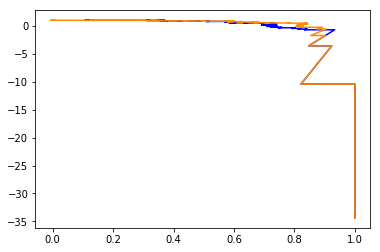

In [42]:
pr_gain_lr = np.divide((precision_lr-pos_ratio),(1-pos_ratio)*precision_lr)
rc_gain_lr = np.divide((recall_lr-pos_ratio),(1-pos_ratio)*recall_lr)
pr_gain_ab = np.divide((precision_ab-pos_ratio),(1-pos_ratio)*precision_ab)
rc_gain_ab = np.divide((recall_ab-pos_ratio),(1-pos_ratio)*recall_ab)

plt.plot(pr_gain_ab,rc_gain_ab,color='blue',label='Adaboost')
plt.plot(pr_gain_lr,rc_gain_lr,color='darkorange',label='Logistic Regression')

Yes, I would agree with the recommendation given by the paper to use PRGain curves instead of PR curves to evaluate models. While the notion of an average F1 score based on Precision-Recall curves might give us an idea of the performance, they might not return the best result. Additionally, every point on the PR curve has a corresponding point on the PRGain curve, where as the vice versa is not true. Thus, it proves advantageous to evaluate our model based on the PR Gain curve, which can be converted into a PR curve if necessary. Addiionally, it also gives us the correct interpretation of "average $F_{\beta}$ score" concept, where the averge score of a model is its mean. 